# Value at Risk (VaR) - Monte Carlo Simulation

# Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set time from to a certain number of years

In [ ]:
years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*years)

# Create a list of tickers

In [ ]:
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

# Download the daily adjusted close prices for the tickers

In [ ]:
adj_close_df = pd.DataFrame()

for ticker in tickers:
    data = yf.download(tickers, start = startDate, end = endDate, auto_adjust = False)
    adj_close_df = data['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


In [ ]:
print(adj_close_df)

Ticker            BND         GLD         QQQ         SPY         VTI
Date                                                                 
2010-06-11  52.296715  120.010002   39.725784   83.347931   42.759186
2010-06-14  52.309704  119.599998   39.717041   83.218750   42.766819
2010-06-15  52.218628  120.989998   40.782230   85.110962   43.729084
2010-06-16  52.342289  120.330002   40.948120   85.080574   43.683250
2010-06-17  52.485443  121.900002   41.079067   85.217384   43.759632
...               ...         ...         ...         ...         ...
2025-06-02  72.370003  311.670013  523.210022  592.710022  291.359985
2025-06-03  72.290001  308.910004  527.299988  596.090027  293.369995
2025-06-04  72.739998  310.899994  528.770020  595.929993  293.339996
2025-06-05  72.599998  309.329987  524.789978  593.049988  291.720001
2025-06-06  72.209999  305.179993  529.919983  599.140015  295.119995

[3771 rows x 5 columns]


# Calculate the daily log returns and drop any NAs

In [ ]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()

print(log_returns)

Ticker           BND       GLD       QQQ       SPY       VTI
Date                                                        
2010-06-14  0.000248 -0.003422 -0.000220 -0.001551  0.000179
2010-06-15 -0.001743  0.011555  0.026466  0.022483  0.022251
2010-06-16  0.002365 -0.005470  0.004059 -0.000357 -0.001049
2010-06-17  0.002731  0.012963  0.003193  0.001607  0.001747
2010-06-18 -0.000372  0.007600  0.000830  0.001083  0.000698
...              ...       ...       ...       ...       ...
2025-06-02 -0.002208  0.026234  0.007867  0.005617  0.005093
2025-06-03 -0.001106 -0.008895  0.007787  0.005686  0.006875
2025-06-04  0.006206  0.006421  0.002784 -0.000269 -0.000102
2025-06-05 -0.001927 -0.005063 -0.007555 -0.004845 -0.005538
2025-06-06 -0.005386 -0.013507  0.009728  0.010217  0.011588

[3770 rows x 5 columns]


# Create a function that will be used to calculate portfolio expected return

*We are assuming that the future returns are based on past returns, which is not a reliable assumption

In [ ]:
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)

# Create a function that will be used to calculate portfolio standard deviation

In [ ]:
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

# Create a covariance matrix for all securities

In [ ]:
cov_matrix = log_returns.cov()
print(cov_matrix)

Ticker           BND       GLD       QQQ           SPY           VTI
Ticker                                                              
BND     9.578421e-06  0.000009  0.000001  6.389692e-07  8.363543e-07
GLD     9.047438e-06  0.000097  0.000007  5.365568e-06  5.903562e-06
QQQ     1.426097e-06  0.000007  0.000172  1.335540e-04  1.360286e-04
SPY     6.389692e-07  0.000005  0.000134  1.194065e-04  1.216172e-04
VTI     8.363543e-07  0.000006  0.000136  1.216172e-04  1.248385e-04


# Create an equally weighted portfolio and find total portfolio expected return and standard deviation

In [ ]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
portfolio_expected_return = expected_return(weights, log_returns)
portfolio_std_dev = standard_deviation(weights, cov_matrix)

# Create a function that gives a random Z-score based on normal distribution

In [ ]:
def random_z_score():
    return np.random.normal(0,1)

# Create a function to calculate scenario Gain/Loss

In [ ]:
days = 5

def scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days):
    return portfolio_value * portfolio_expected_return * days + portfolio_value * portfolio_std_dev * z_score

# Run 10000 simulations

In [ ]:
simulations = 10000
scenarioReturn = []

for i in range(simulations):
    z_score = random_z_score()
    scenarioReturn.append(scenario_gain_loss(portfolio_value, portfolio_std_dev, z_score, days))


# Specify a confidence interval and calculate the Value at Risk (VaR)

In [ ]:
confidence_interval = 0.90

VaR = -np.percentile(scenarioReturn, 100*(1- confidence_interval))
print(VaR)

7137.070902723749


Plot the results of all 10000 scenarios

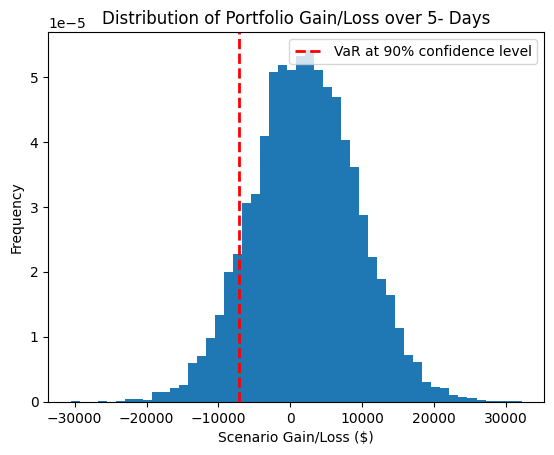

In [ ]:
plt.hist(scenarioReturn, bins = 50, density = True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio Gain/Loss over {days}- Days')
plt.axvline(-VaR, color = 'r', linestyle = 'dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()